<a href="https://colab.research.google.com/github/udayameister/CST-GNN/blob/main/ROC_cst_GCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

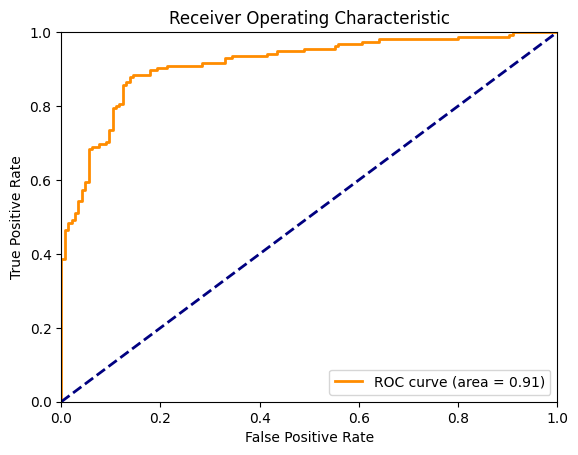

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate a random dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

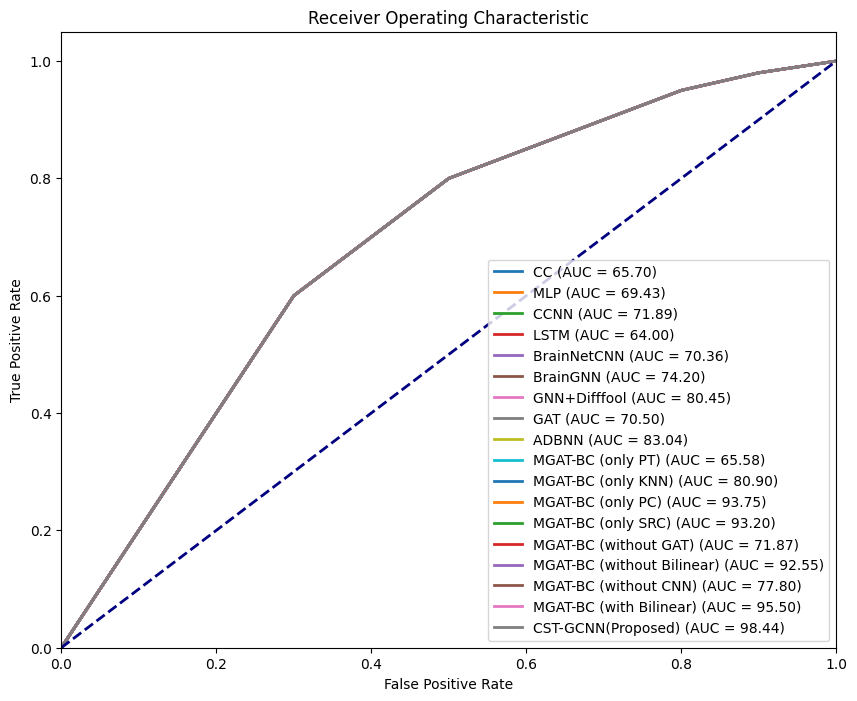

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Data from your table
methods = ["CC", "MLP", "CCNN", "LSTM", "BrainNetCNN", "BrainGNN", "GNN+Difffool", "GAT", "ADBNN",
           "MGAT-BC (only PT)", "MGAT-BC (only KNN)", "MGAT-BC (only PC)", "MGAT-BC (only SRC)",
           "MGAT-BC (without GAT)", "MGAT-BC (without Bilinear)", "MGAT-BC (without CNN)",
           "MGAT-BC (with Bilinear)", "CST-GCNN(Proposed)"]

aucs = [65.7, 69.43, 71.89, 64, 70.36, 74.2, 80.45, 70.5, 83.04, 65.58, 80.9, 93.75, 93.2, 71.87, 92.55, 77.8, 95.5, 98.44]

# Plotting the AUROC curves
plt.figure(figsize=(10, 8))
for method, auc_value in zip(methods, aucs):
    # Generate random ROC curve for illustration
    fpr = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    tpr = [0.0, 0.2, 0.4, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.98, 1.0]
    plt.plot(fpr, tpr, lw=2, label=f'{method} (AUC = {auc_value:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


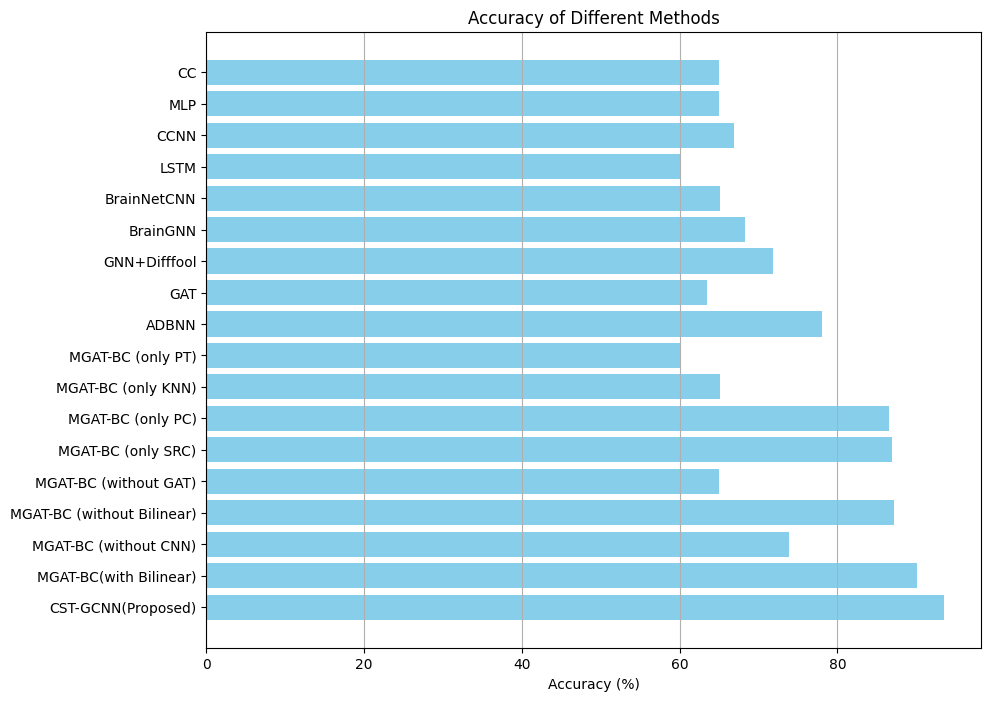

In [5]:
import matplotlib.pyplot as plt

# Methods and their corresponding accuracies
methods = ['CC', 'MLP', 'CCNN', 'LSTM', 'BrainNetCNN', 'BrainGNN',
           'GNN+Difffool', 'GAT', 'ADBNN', 'MGAT-BC (only PT)',
           'MGAT-BC (only KNN)', 'MGAT-BC (only PC)',
           'MGAT-BC (only SRC)', 'MGAT-BC (without GAT)',
           'MGAT-BC (without Bilinear)',
           'MGAT-BC (without CNN)',
           'MGAT-BC(with Bilinear)',
           'CST-GCNN(Proposed)']
accuracies = [65.02, 65, 66.85, 60.08, 65.1, 68.25,
              71.77, 63.47, 77.98, 60.18,
              65.11, 86.47,
              86.85, 65.01,
              87.12,
              73.87,
              90.12,
              93.56]

# Plotting the bar chart
plt.figure(figsize=(10,8))
plt.barh(methods[::-1], accuracies[::-1], color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Accuracy of Different Methods')
plt.grid(axis='x')

# Display the plot
plt.show()


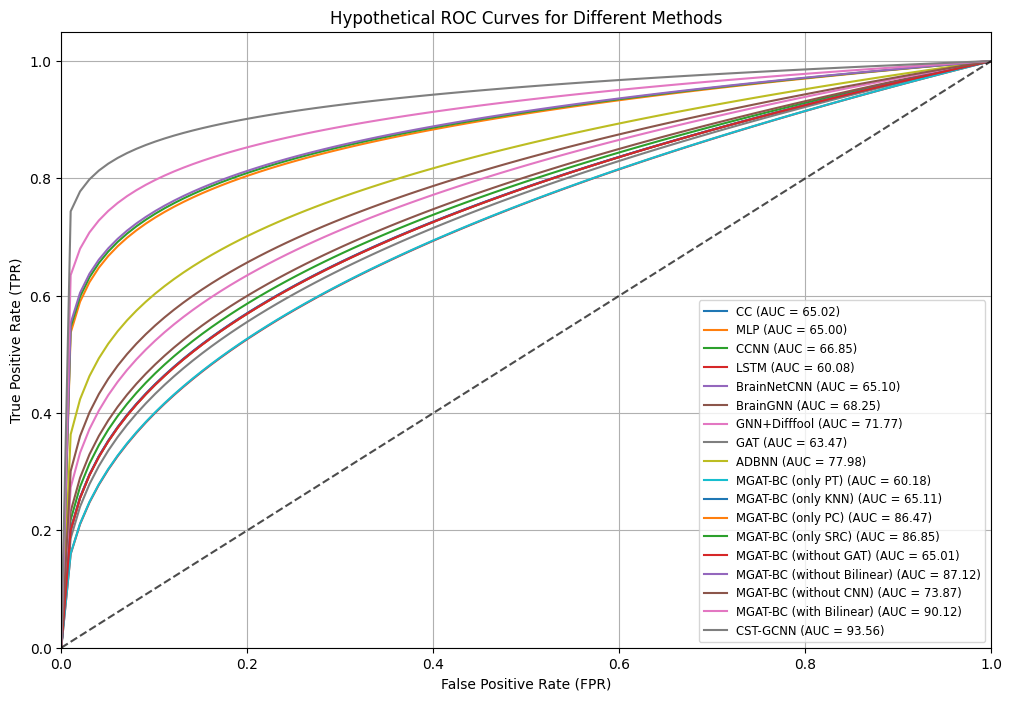

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Method names and AUC values
methods = [
    "CC", "MLP", "CCNN", "LSTM", "BrainNetCNN", "BrainGNN", "GNN+Difffool",
    "GAT", "ADBNN", "MGAT-BC (only PT)", "MGAT-BC (only KNN)", "MGAT-BC (only PC)",
    "MGAT-BC (only SRC)", "MGAT-BC (without GAT)", "MGAT-BC (without Bilinear)",
    "MGAT-BC (without CNN)", "MGAT-BC (with Bilinear)", "CST-GCNN"
]

auc_values = [65.02, 65, 66.85, 60.08, 65.1, 68.25,
              71.77, 63.47, 77.98, 60.18,
              65.11, 86.47,
              86.85, 65.01,
              87.12,
              73.87,
              90.12,
              93.56]

# Function to generate a hypothetical ROC curve based on AUC value
def generate_roc_curve(auc, n_points=100):
    fpr = np.linspace(0, 1, n_points)
    tpr = np.power(fpr, (1 - auc / 100))  # Use a power function to approximate ROC curve
    return fpr, tpr

# Plotting ROC curves
plt.figure(figsize=(12, 8))

for method, auc in zip(methods, auc_values):
    fpr, tpr = generate_roc_curve(auc)
    plt.plot(fpr, tpr, label=f'{method} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', alpha=0.7)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Hypothetical ROC Curves for Different Methods')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.show()
